<a href="https://colab.research.google.com/github/mariel0503/aprendizaje-automatico-252601/blob/main/4_6_1_M%C3%A9todos_de_clustering_basado_en_densidad_Mariel_Milan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.6.1: Taller de Métodos de Clustering Basados en Densidad**


## OBJETIVOS DEL TALLER:
En esta práctica vamos a ver cómo funcionan los algoritmos de clustering basado en Densidad los cuales agrupan puntos de datos basándose en regiones de alta densidad de puntos, separadas por regiones de baja densidad.

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
from matplotlib.cm import get_cmap
from scipy.cluster.hierarchy import dendrogram

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [2]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


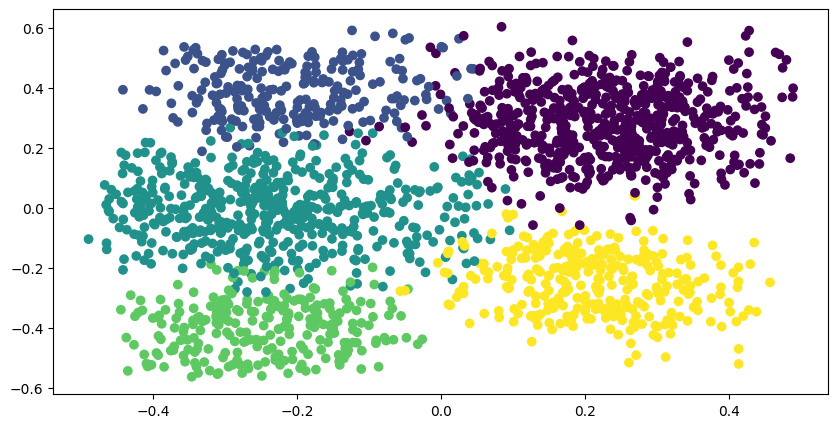

In [3]:
# Cargar dataset
D =cargar_dataset("dataset_inseparable.xlsx")

D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,1:3]
Dy = D[:,3]

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0], Dx[:,1], c = Dy)

# 🎯 **1:Cree el Algoritmo de Clustering DBSCAN**

## Calcular el Vecindario
Uno de los pasos clave del algoritmo DBSCAN es el descubrimiento del vecindario (de un ejemplo $x_i$). Para ello sólo se precisa de la matriz de distancias y el parámetro $\epsilon$ que marca un umbral en la distancia máxima entre dos puntos que define el vecindario:

In [4]:
def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

In [5]:
def encuentra_vecindario(mDistancia, i, eps):
    vecinos = np.where(mDistancia[i,:] < eps)[0]# P1 SU CODIGO AQUI
    vecinos = vecinos[vecinos != i]
    return vecinos

## Crear el algoritmo DBSCAN

In [6]:
def expandir_cluster(mDistancia, labels, vecindario, C, eps, M):
    it = 0
    while it < vecindario.size:
        j = vecindario[it]
        if labels[j] == -1:
            # si el elemento ha sido etiquetado como "no nuclear"
            labels[j] = C
        elif labels[j] == 0:
            # si el elemento no ha sido etiquetado todavía
            labels[j] = C
            # calculamos su vecindario
            vecindario_j = encuentra_vecindario(mDistancia, j, eps)
            if vecindario_j.size >= M:
                # si "j" es un punto nuclear, mezclamos el punto j y sus vecinos
                # con el vecindario que estamos recorriendo
                vecindario = np.append(vecindario, vecindario_j)# P2 SU CODIGO AQUI
        it += 1

In [7]:
def agrupamiento_densidad_DBSCAN(mDistancia, eps, M):
    labels = np.zeros(mDistancia.shape[0])
    C = 0
    for i in np.arange(mDistancia.shape[0]):
        if labels[i] != 0:
            continue
        vecindario = encuentra_vecindario(mDistancia, i, eps)
        if len(vecindario) < M:
            # Si NO es un punto nuclear
            labels[i] =  -1# P3 SU CODIGO AQUI
        else:
            # Si es un punto nuclear, le asignamos un nuevo C y tratamos de expandirlo
            C += 1
            labels[i] = C # P4 SU CODIGO AQUI
            expandir_cluster(mDistancia, labels, vecindario, C, eps, M)
    return labels

## Ahora ya estamos en disposición de realizar el DBSCAN.


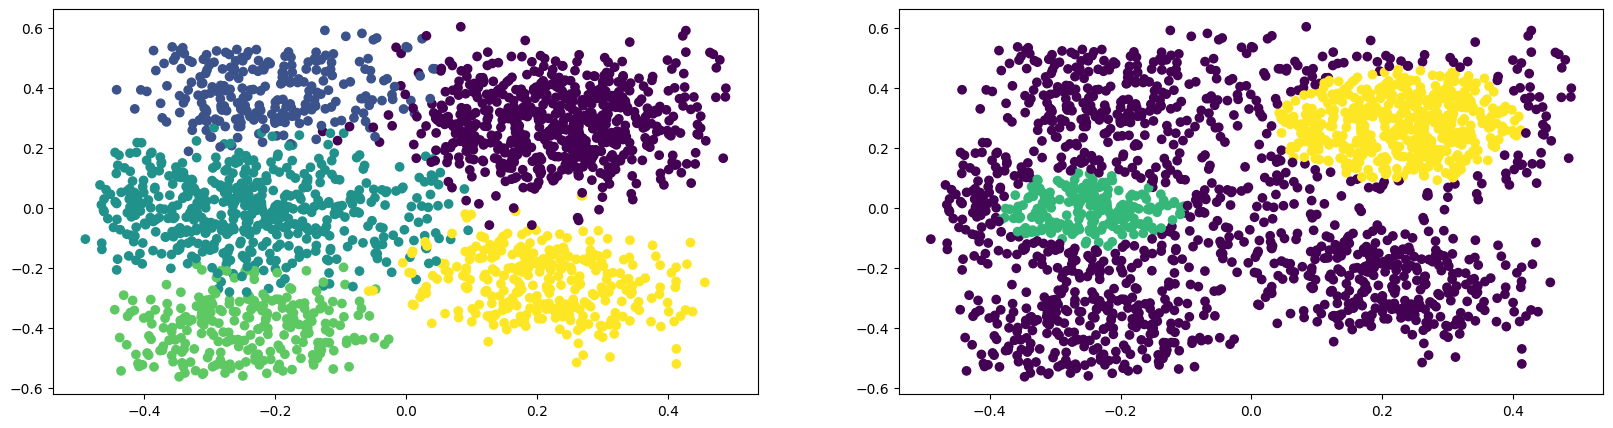

In [8]:
eps = 0.07
M = 70

mDistancia = matriz_distancias(Dx, distancia_euclidiana) # P5 SU CODIGO AQUI
Dyp = agrupamiento_densidad_DBSCAN(mDistancia,eps,M)

fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].scatter(Dx[:,0], Dx[:,1], c = Dy)
ax[1].scatter(Dx[:,0], Dx[:,1], c = Dyp)

<hr>
Podemos jugar con diferentes valores de $\epsilon$ y $M$ para ver su efecto sobre diferentes conjuntos de datos:


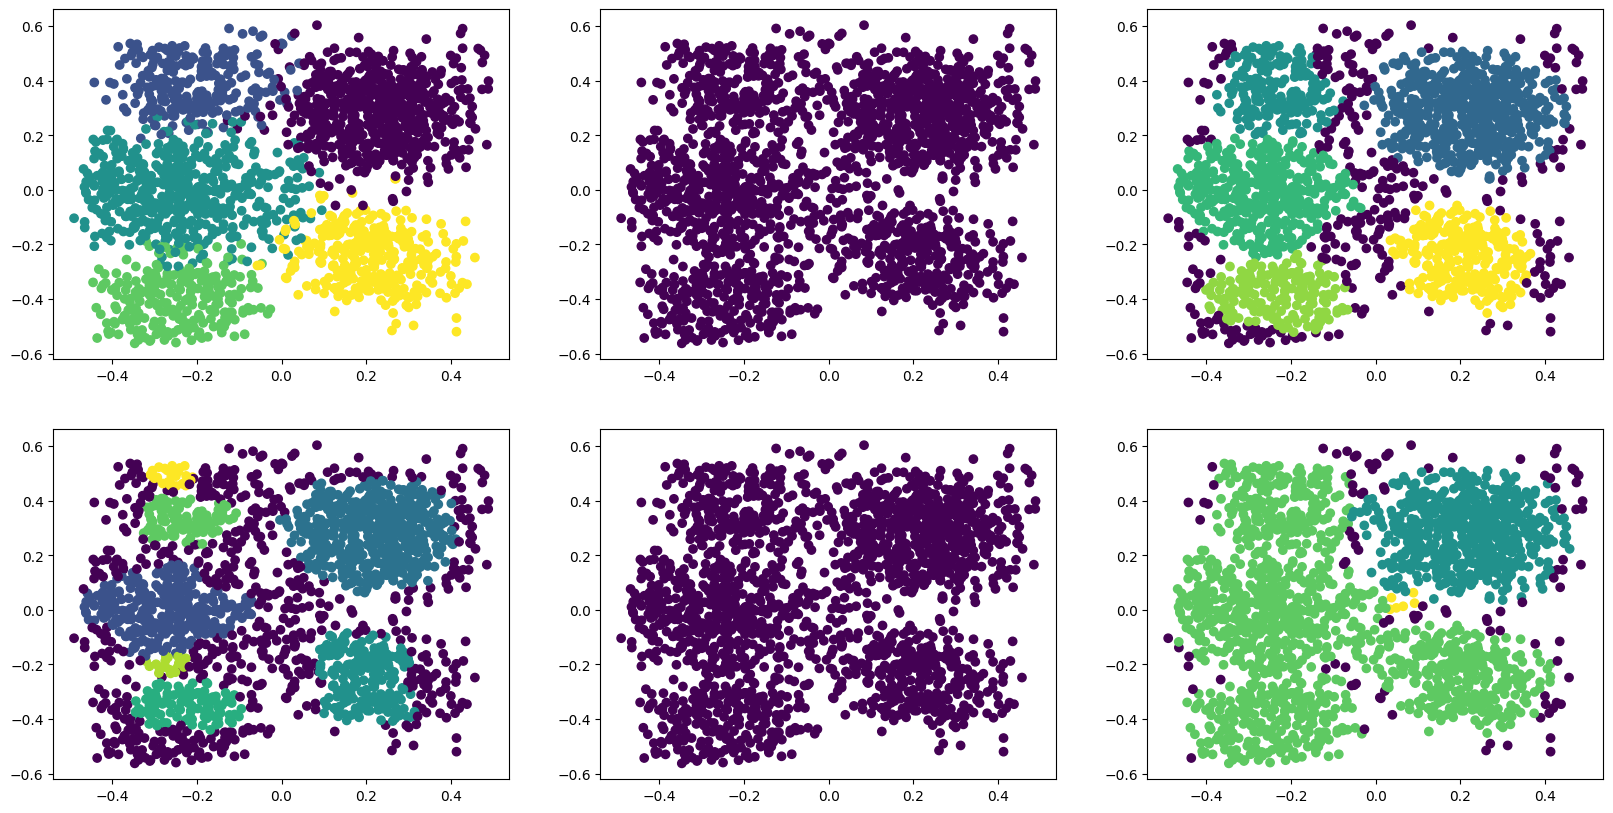

In [9]:
Dyp1 = agrupamiento_densidad_DBSCAN(mDistancia,eps=.03,M=38)
Dyp2 = agrupamiento_densidad_DBSCAN(mDistancia,eps=.07,M=38)
Dyp3 = agrupamiento_densidad_DBSCAN(mDistancia,eps=.05,M=25)
Dyp4 = agrupamiento_densidad_DBSCAN(mDistancia,eps=.03,M=48)
Dyp5 = agrupamiento_densidad_DBSCAN(mDistancia,eps=.06,M=18)

fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].scatter(Dx[:,0], Dx[:,1], c = Dy)
ax[0,1].scatter(Dx[:,0], Dx[:,1], c = Dyp1)
ax[0,2].scatter(Dx[:,0], Dx[:,1], c = Dyp2)
ax[1,0].scatter(Dx[:,0], Dx[:,1], c = Dyp3)
ax[1,1].scatter(Dx[:,0], Dx[:,1], c = Dyp4)
ax[1,2].scatter(Dx[:,0], Dx[:,1], c = Dyp5)

✅ Dataset cargado desde URL GitHub


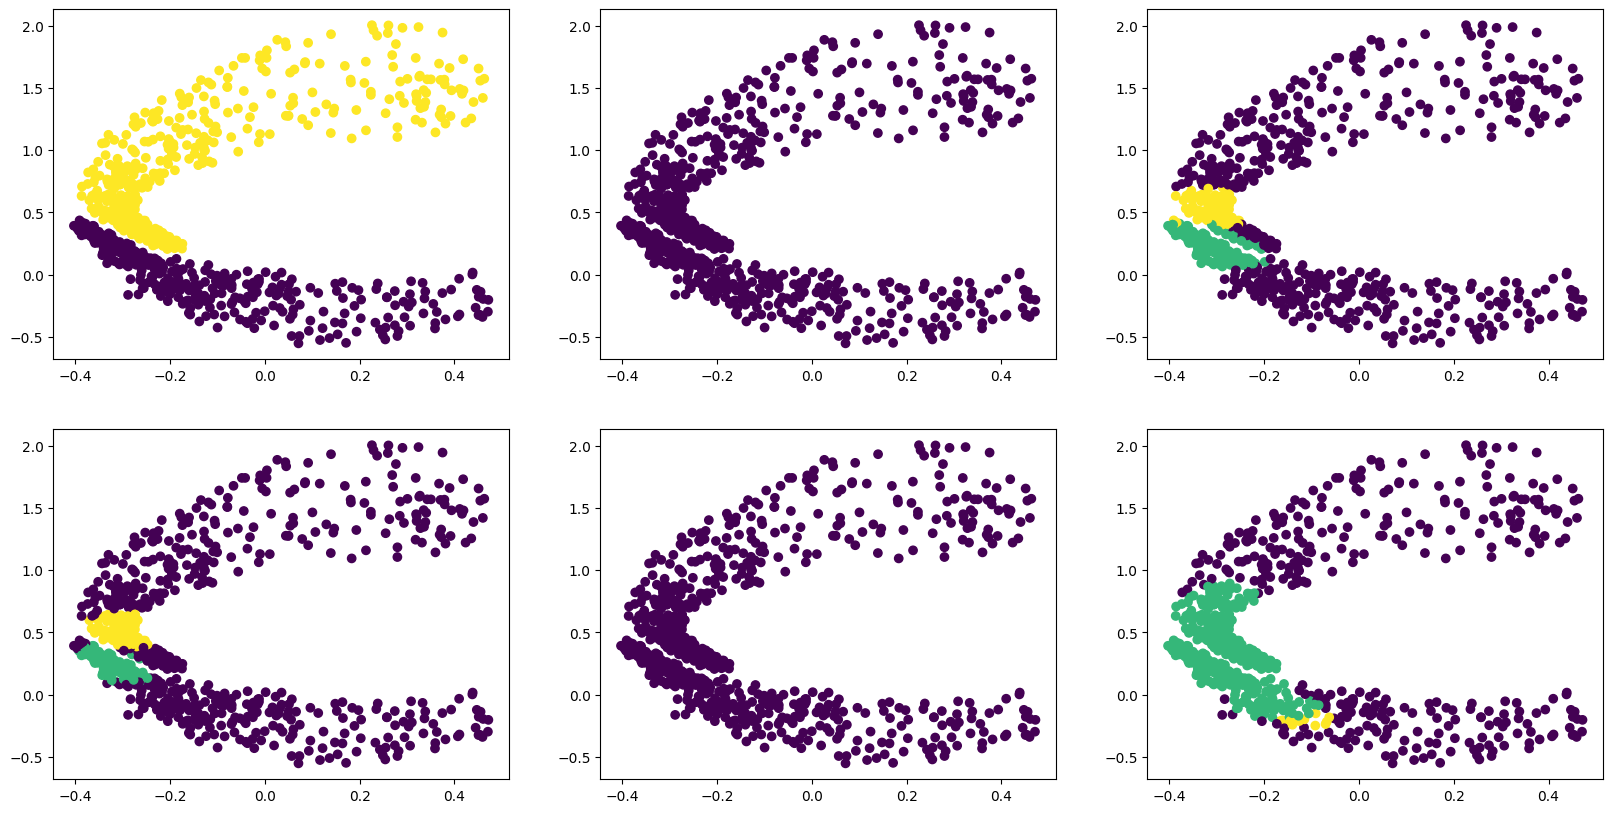

In [12]:
D =cargar_dataset("dataset_dos_remolinos.xlsx")
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,1:3]
Dy = D[:,3]

mDistancia = matriz_distancias(Dx, distancia_euclidiana)

Dyp1 = agrupamiento_densidad_DBSCAN(mDistancia, eps=.03, M=38)
Dyp2 = agrupamiento_densidad_DBSCAN(mDistancia, eps=.07, M=38)
Dyp3 = agrupamiento_densidad_DBSCAN(mDistancia, eps=.05, M=25)
Dyp4 = agrupamiento_densidad_DBSCAN(mDistancia, eps=.03, M=48)
Dyp5 = agrupamiento_densidad_DBSCAN(mDistancia, eps=.06, M=18)
# P6 SU CODIGO AQUI

fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].scatter(Dx[:,0], Dx[:,1], c = Dy)
ax[0,1].scatter(Dx[:,0], Dx[:,1], c = Dyp1)
ax[0,2].scatter(Dx[:,0], Dx[:,1], c = Dyp2)
ax[1,0].scatter(Dx[:,0], Dx[:,1], c = Dyp3)
ax[1,1].scatter(Dx[:,0], Dx[:,1], c = Dyp4)
ax[1,2].scatter(Dx[:,0], Dx[:,1], c = Dyp5)

✅ Dataset cargado desde URL GitHub


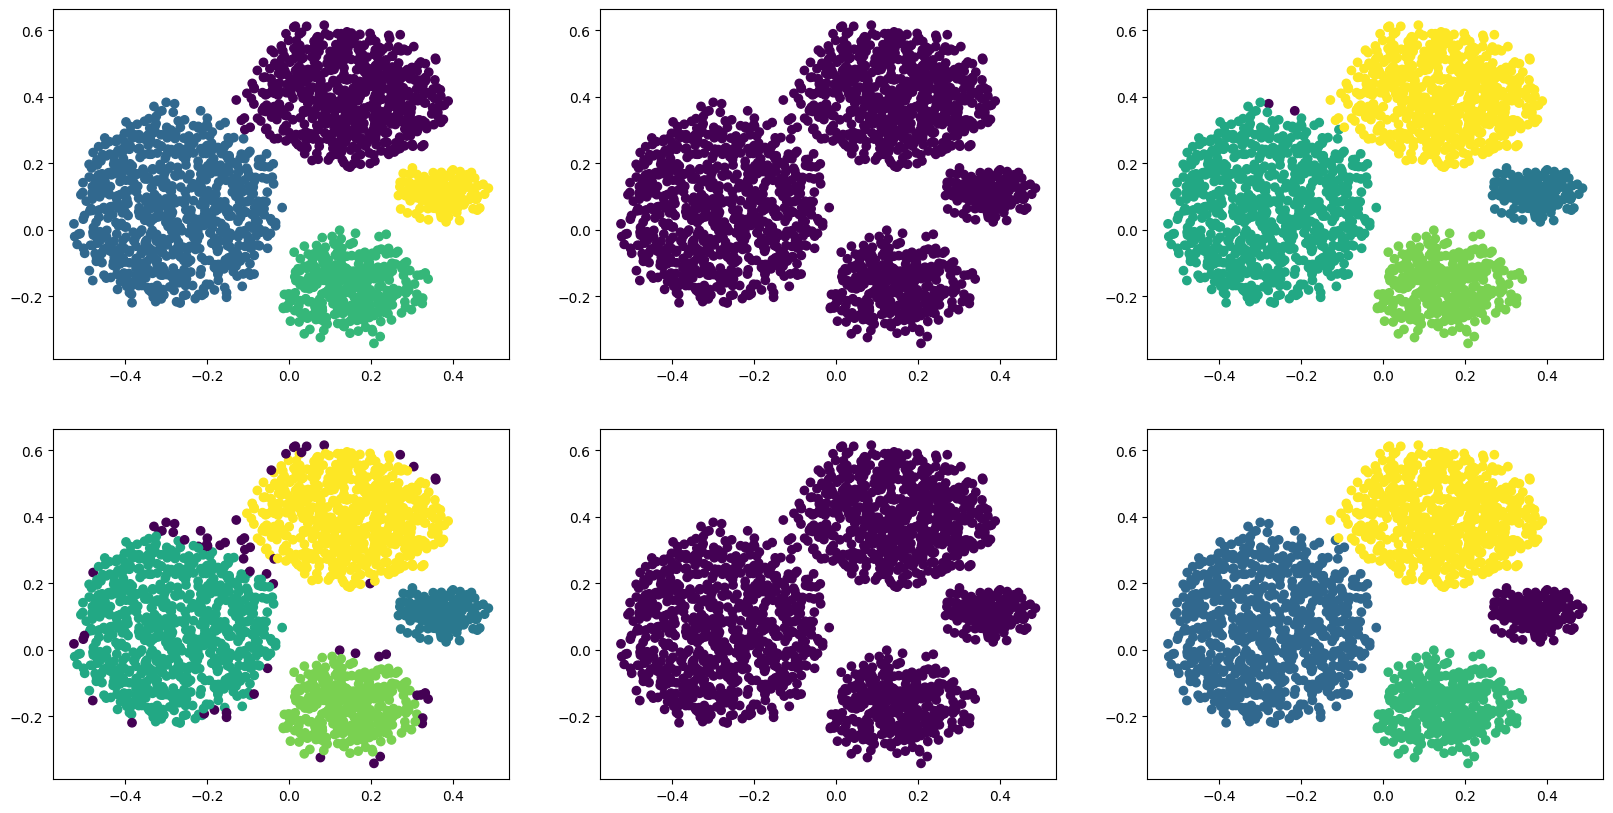

In [14]:
D =cargar_dataset("dataset_cuatro_diferente_medida.xlsx")
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,1:3]
Dy = D[:,3]

mDistancia = matriz_distancias(Dx, distancia_euclidiana)

Dyp1 = agrupamiento_densidad_DBSCAN(mDistancia, eps=.03, M=38)
Dyp2 = agrupamiento_densidad_DBSCAN(mDistancia, eps=.07, M=38)
Dyp3 = agrupamiento_densidad_DBSCAN(mDistancia, eps=.05, M=25)
Dyp4 = agrupamiento_densidad_DBSCAN(mDistancia, eps=.03, M=48)
Dyp5 = agrupamiento_densidad_DBSCAN(mDistancia, eps=.06, M=18)
 # P7 SU CODIGO AQUI

fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].scatter(Dx[:,0], Dx[:,1], c = Dy)
ax[0,1].scatter(Dx[:,0], Dx[:,1], c = Dyp1)
ax[0,2].scatter(Dx[:,0], Dx[:,1], c = Dyp2)
ax[1,0].scatter(Dx[:,0], Dx[:,1], c = Dyp3)
ax[1,1].scatter(Dx[:,0], Dx[:,1], c = Dyp4)
ax[1,2].scatter(Dx[:,0], Dx[:,1], c = Dyp5)

<hr>
<h2>Implementaciones en librerías de Python</h2>

Scikit-learn (scikit-learn) es la implementación más popular y ampliamente utilizada:

In [15]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(Dx)

print(f"\n📊 Información del dataset:")
print(f"   • Número total de puntos: {len(Dx)}")
print(f"   • Dimensionalidad: {Dx.shape[1]}")
print(f"   • Rango de valores: [{Dx.min():.2f}, {Dx.max():.2f}]")


📊 Información del dataset:
   • Número total de puntos: 1999
   • Dimensionalidad: 2
   • Rango de valores: [-0.53, 0.62]


In [16]:
from sklearn.cluster import DBSCAN
eps = 0.07      # Distancia máxima entre puntos del mismo cluster
min_samples = 38  # Mínimo de puntos para formar un cluster

# Crear y entrenar el modelo
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
clusters = dbscan.fit_predict(Dx)

print("\n📈 RESULTADOS DEL CLUSTERING:")

# Número de clusters (excluyendo el ruido etiquetado como -1)
unique_clusters = np.unique(clusters)
n_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)
n_noise = np.sum(clusters == -1)

print(f"   • Número de clusters encontrados: {n_clusters}")
print(f"   • Puntos clasificados como ruido: {n_noise} ({n_noise/len(clusters)*100:.1f}%)")
print(f"   • Parámetros usados: eps={eps}, min_samples={min_samples}")



📈 RESULTADOS DEL CLUSTERING:
   • Número de clusters encontrados: 4
   • Puntos clasificados como ruido: 2 (0.1%)
   • Parámetros usados: eps=0.07, min_samples=38


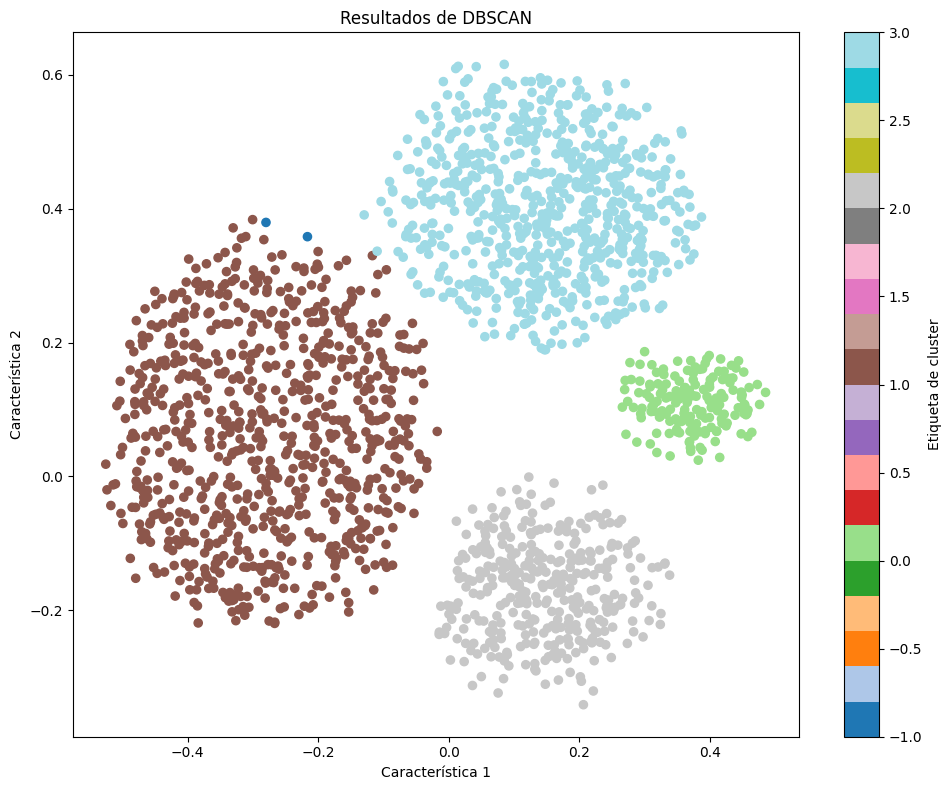

In [24]:
 # GRAFICAR LOS GRUPOS

 # P8 SU CODIGO AQUI

fig, ax = plt.subplots(figsize=(10,8))

# Graficar clusters encontrados por DBSCAN
scatter = ax.scatter(Dx[:,0],Dx[:,1],c=clusters,cmap='tab20',s=35)

ax.set_title("Resultados de DBSCAN")
ax.set_xlabel("Característica 1")
ax.set_ylabel("Característica 2")

plt.colorbar(scatter, label="Etiqueta de cluster")

plt.tight_layout()
plt.show()


# 🚀 ¡TALLER FINALIZADO!"